Task 4: SMS Spam Detection

We are building an AI model that can classify SMS messages as spam or legitimate. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
#load dataset
data= pd.read_csv(r"C:\Users\sujal\CodSoft\Spam SMS Detection\archive\spam.csv", encoding= "ISO-8859-1")

In [24]:
print(data.shape)
data.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [25]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


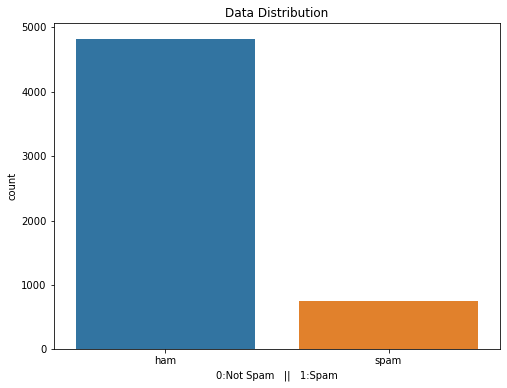

In [26]:
plt.figure(figsize= (8,6))
sns.countplot(x= "v1", data= data)
plt.title("Data Distribution")
plt.xlabel("0:Not Spam   ||   1:Spam")
plt.ylabel("count")
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [29]:
colsToDrop= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data.drop(columns= colsToDrop, inplace= True)

In [30]:
print(data.shape)

(5572, 2)


In [31]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
data["v1"]= data["v1"].map({'ham': 0, 'spam': 1})
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
#text preprocessing
tfidfvectorizer= TfidfVectorizer()
X= tfidfvectorizer.fit_transform(data['v2'])
y= data['v1']


In [34]:
#train test split
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#building model with logistic regression
LR= LogisticRegression()
LR.fit(X_train, Y_train)
Y_predict= LR.predict(X_test)
print('model score in training data', LR.score(X_test, Y_test))
print(classification_report(Y_predict, Y_test))
accuracy= accuracy_score(Y_test, Y_predict)
print("Validation Accuracy", accuracy)

model score in training data 0.9623318385650225
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1007
           1       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Validation Accuracy 0.9623318385650225


In [43]:
#building model with naive bayes
mnb= MultinomialNB()
mnb.fit(X_train, Y_train)
print("model score in training data", mnb.score(X_test, Y_test))
y_predict= mnb.predict(X_test)
print(classification_report(y_predict, Y_test))
accuracy= accuracy_score(y_predict, Y_test)
print("Validation Accuracy", accuracy)

model score in training data 0.9623318385650225
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1007
           1       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Validation Accuracy 0.9623318385650225
